In [1]:
import sys
XCr_path = '/Users/aliaksei/Documents/lume/Crystal'
sys.path.append(XCr_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from XCrystal import *
import time

In [2]:
Npoints = 10
delta_theta = np.linspace(-13.862472049580001e-6, 41.54780686945001e-6, Npoints)  
omega0 = 9000.0
Rs = np.zeros(Npoints)
Ts = np.zeros(Npoints)

In [5]:
def single_realization(delta_theta, omega):
    
    xcr = XCrystal(omega, XCr_path+'/Crystal.yaml')
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission

In [6]:
for i in range(0, Npoints):
    Rs[i], Ts[i] = single_realization(delta_theta[i], omega0)

Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Initialized tools...
Delta theta:  -1.3862472049580001e-05 ; Reflectivity:  0.008086036400713818 ; Transmission:  0.42235493075327324
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Initialized tools...
Delta theta:  -7.70577439191e-06 ; Reflectivity:  0.016499286523464718 ; Transmission:  0.4399903119529626
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Initialized tools...
Delta theta:  -1.5490767342399981e-06 ; Reflectivity:  0.09076725140867355 ; Transmission:  0.43833892949749526
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Initialized tools...
Delta theta:  4.607620923430004e-06 ; Reflectivity:  0.15646042067720098 ; Transmission:  0.44875949580781715
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Initialized tools...
Delta theta:  1.0764318581100005e-05 ;

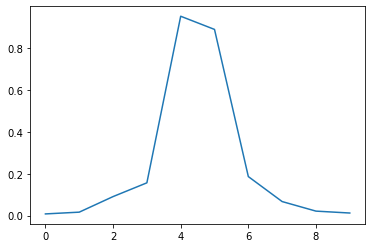

In [7]:
plt.figure()
plt.plot(Rs)